### 목표
- 컬러이미지 -> 흑백(gray)이미지
- 흑백(gray)이미지-> 이진(binary)이미지
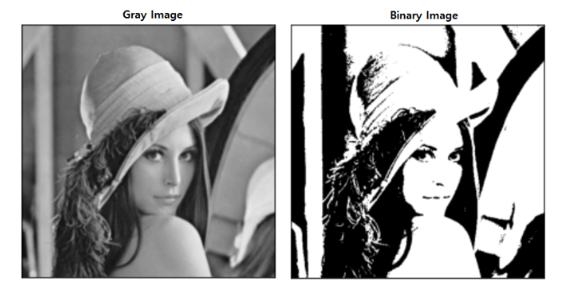

-흑백 이미지(gray): 0~255로 이루어진 이미지

-이진 이미지(binary): 0(흑) or 1(백)로 이루어진 이미지 


1. color->gray 변환 하는 방법
2. 처음부터 gray로 불러오는 방법

In [1]:
import matplotlib.pyplot as plt
import cv2 
import pandas as pd
import numpy as np

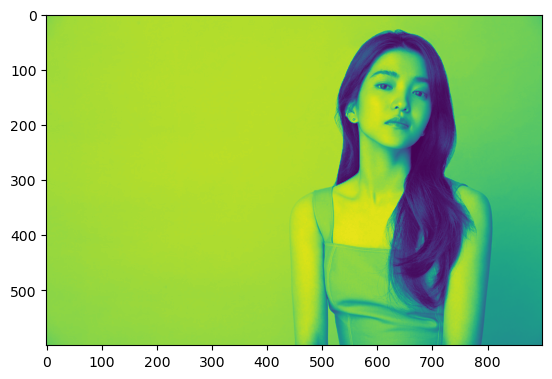

In [2]:
Kim=cv2.imread('Kim.jpg',cv2.IMREAD_COLOR)
grayKim=cv2.cvtColor(Kim,cv2.COLOR_BGR2GRAY)
plt.imshow(grayKim)

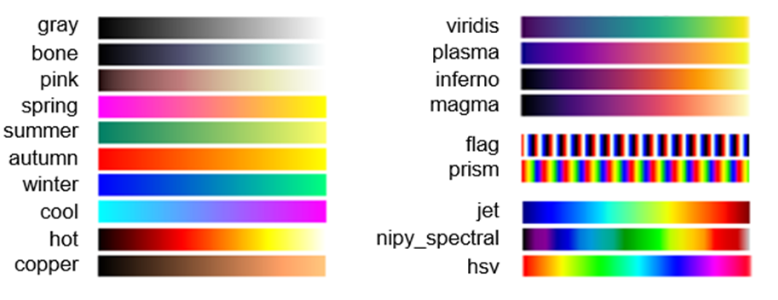

matplotLib 내부 차트 default값 => viridis 이기에 위처럼나옴
- plt.imshow(grayKim,cmap='gray') 이렇게 바꿔주면 됩니다. 

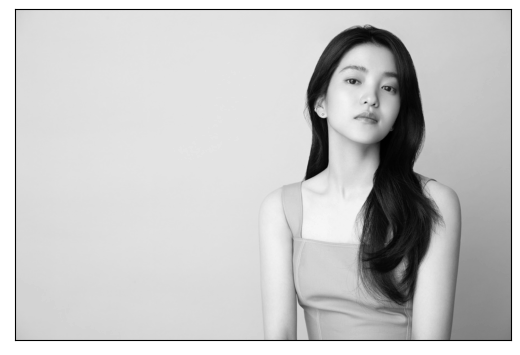

In [3]:
#1. COLOR 에서 GRAY로 변환하는 코드!
Kim=cv2.imread('Kim.jpg',cv2.IMREAD_COLOR)
grayKim=cv2.cvtColor(Kim,cv2.COLOR_BGR2GRAY)
plt.xticks([]),plt.yticks([])
plt.imshow(grayKim,cmap='gray')

Text(0.5, 1.0, 'KimTaeRi')

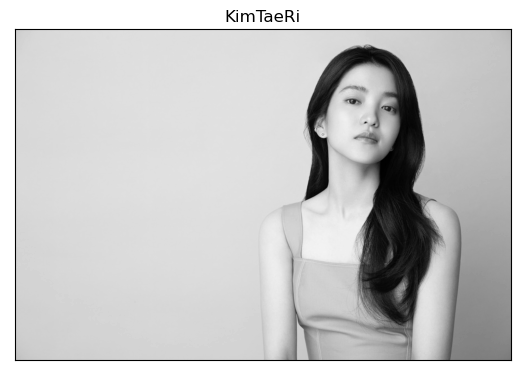

In [4]:
#2. 처음부터 흑백이미지로 가져오기
grayKim2=cv2.imread('Kim.jpg',cv2.IMREAD_GRAYSCALE)
plt.xticks([]),plt.yticks([])
plt.imshow(grayKim2,cmap='gray')
#차트 제목붙이기
plt.title('KimTaeRi')

### 이진(binary)이미지만들기 
- 이진이미지는 픽셀값이 0(흑) 또는 1(백)로만 구성되어있다!
- 이진이미지는 배경과 객체의 구분이 필요할때 사용합니다. !! 관심영역/ 비관심영역


### cv2.threshold(img,threshold_value,value,flag)
- parameter 4개
- img
- threshold_value: pixel 문턱값(0,1로 나누기 위한 기준)
- value: 문턱값(임계값)보다 클 경우에 적용할 값



- flag : 문턱값 적용 방법 (다양한 형태의 이진화 방법) 실제로는 위의 두값을 사용
  - cv2.THRESH_BINARY : 픽셀값이 문턱값보다 크면 value, 아니면 0을 할당
  - cv2.THRESH_BINARY_INV : 픽셀값이 문턱값보다 크면 0, 아니면 value를 할당 (inverse)
  - cv2.THRESH_TRUNC : 픽셀값이 문턱값보다 크면 문턱값, 아니면 픽셀값을 그대로 할당
  - cv2.THRESH_TOZERO : 픽셀값이 문턱값보다 크면 픽셀값, 아니면 0을 할당
  - cv2.THRESH_TOZERO_INV : 픽셀값이 문턱값보다 크면 0, 아니면 픽셀값을 할당


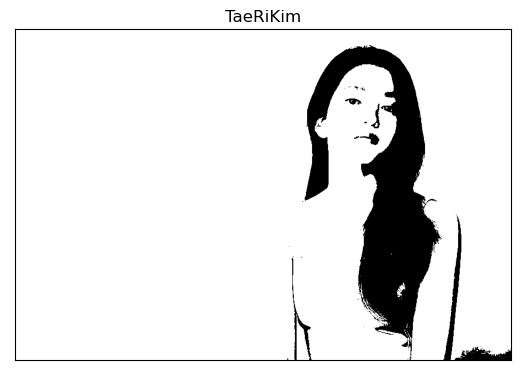

In [5]:
Kim=cv2.imread('Kim.jpg',cv2.IMREAD_GRAYSCALE)
_, thr1= cv2.threshold(Kim,128,255,cv2.THRESH_BINARY)
# _의 의미: 첫번째 반환값을 받지 않겠다라는 의미 (왜 우리가 넣어준값이니 굳이?)
plt.xticks([]),plt.yticks([])
plt.title('TaeRiKim')
plt.imshow(thr1,cmap='gray')

Text(0.5, 1.0, 'BINARYTOZERO')

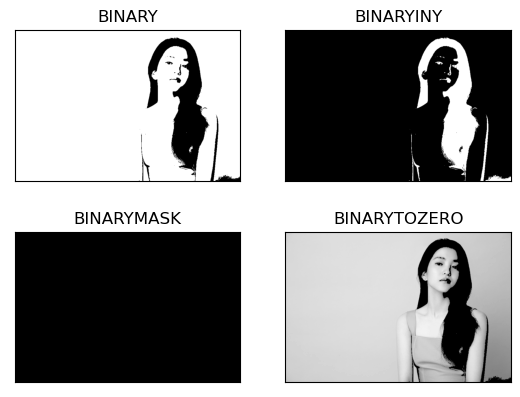

In [6]:
#여러개의 flag 설정
#subplot(m,n,p) m x n #p

plt.subplot(2,2,1) #행x열 위치값
_,th1=cv2.threshold(Kim,128,255,cv2.THRESH_BINARY)
plt.imshow(th1, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('BINARY')

plt.subplot(2,2,2) #행x열 위치값
_,th2=cv2.threshold(Kim,128,255,cv2.THRESH_BINARY_INV)
plt.imshow(th2, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('BINARYINY')

plt.subplot(2,2,3) #행x열 위치값
_,th3=cv2.threshold(Kim,128,255,cv2.THRESH_MASK)
plt.imshow(th3, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('BINARYMASK')

plt.subplot(2,2,4) #행x열 위치값
_,th4=cv2.threshold(Kim,128,255,cv2.THRESH_TOZERO)
plt.imshow(th4, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('BINARYTOZERO')

Text(0.5, 1.0, 'BINARYTOZEROINV and SPRING')

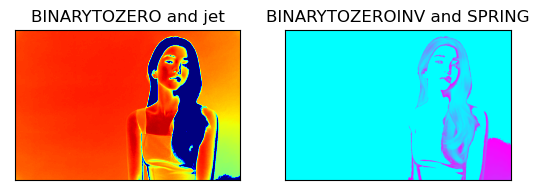

In [7]:
plt.subplot(2,2,1)
_,thr1=cv2.threshold(Kim,128,255,cv2.THRESH_TOZERO)
plt.imshow(thr1,cmap='jet')
plt.xticks([]),plt.yticks([])
plt.title('BINARYTOZERO and jet')


plt.subplot(2,2,2)
_,thr2=cv2.threshold(Kim,150,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thr2,cmap='cool')
plt.xticks([]),plt.yticks([])
plt.title('BINARYTOZEROINV and SPRING')

### 임계값 (문턱값)결정하기 :OTSU 알고리즘
- 임계값을 사람이 직접 변경해서 확인하기에는 한계가 있음
- 가장 극대화된 효과 100값을 나타내줌
- 이진이미지를 만들때 가장 중요한 요소: 임계값 설정
- OTSU 이진화 알고리즘을 사용하여 최적의 임계값을 찾아보자.
    - 임의의 임계값을 임의로 지정하여 픽셀을 변경
    - 두 분류의 명암분포를 구분
    - 두 분류의 명암분포가 가장 균일할때의 임계값을 설정
- OTSU 이진화 알고리즘 적용방법
    - 임계값을 -1로 설정 후 옵션 THRESH_OTSU 설정하여 이진화 진행
    - 단점 모든 경우의 수를 조사하기에 속도가 느림

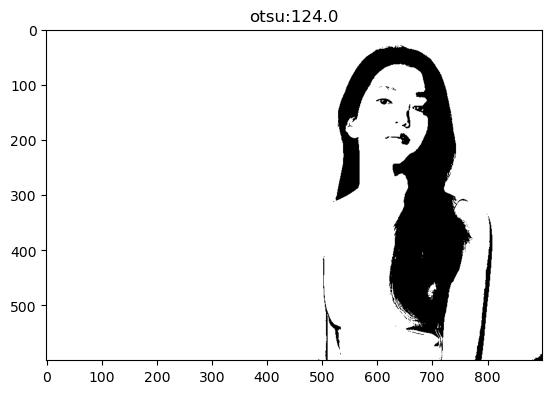

In [8]:
Kim=cv2.imread('Kim.jpg',cv2.IMREAD_GRAYSCALE)

# OTSU 이진화 알고리즘 적용 방식! 
t,otsu1=cv2.threshold(Kim,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# 1. 임계값이 얼만지 2. 이미지를 반환 해줌
plt.title(f'otsu:{t}')
plt.imshow(otsu1,cmap='gray')
# otsu가 임계치가 최대로 될때를 찾아서 가져와줬음




### 스도쿠 이미지 이진화 진행

# sudoku_img=cv2.imread('sudoku.jpg',cv2.IMREAD_GRAYSCALE)
t, sudoku=cv2.threshold(sudoku_img,-1,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
plt.imshow(sudoku,cmap='gray')




## 임계값 주는 방법 2번째
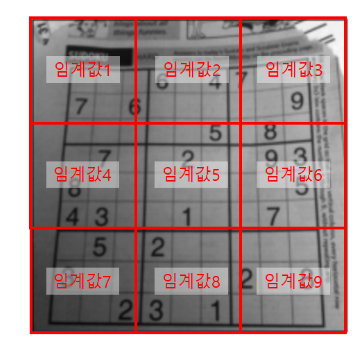

- cv2.adaptiveThreshold(img,value,method,type_flag,block_size,C)
    - img: 입력할 이미지
    - value: 임계값을 만족하는 픽셀에 적용할 값
    - method: 임계값 결정하는 방법 2가지 (평균, 가우시안분포)
         - 평균: 이웃의 픽셀 평균값으로 임계값을 결정
         - 가우시안 분포: 흐리게 보이지만 잡음이 줄어듦
    - type_flag :  적용방법(위 flag와 동일)
    - block_size: 영역을 나눌 블록의 개수 (사용자가 설정)_ (m x n ) 위는 3x3, 반드시 홀수개로 나눠줘야함
    - C : 계산된 임계값 결과에서 가감할 수 

In [23]:
#cv2.adaptiveThreshold(img,value,method,type_flag,block_size,C)
#block_size 반드시 홀수로 지정! 

#평균
th3=cv2.adaptiveThreshold(Kim,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,5)
#가우시안
th4=cv2.adaptiveThreshold(Kim,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,5)

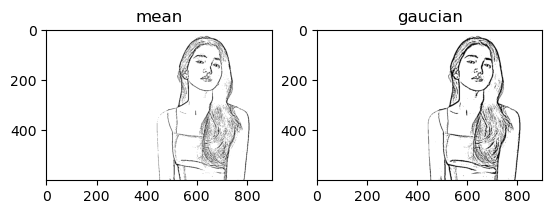

In [31]:
th4,th3
plt.subplot(2,2,1)
plt.imshow(th4,cmap='gray')
plt.title('mean')

plt.subplot(2,2,2)
plt.title('gaucian')
plt.imshow(th3,cmap='gray')

#임계치가 더 나아짐.